# The Sparks Foundation: Task 1- Prediction using Supervised Machine Learning ( Beginner)

GRIP November 2022

Name : USHA MADHURI

Domain : Data science and Business analytics

Problem statement: Prediction using supervised machine learning. Predict the percentage of an student based on the no of study hours. what will be the predicted score of a student studies for 9.25 hrs/day?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from the link
url="http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.shape

(25, 2)

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


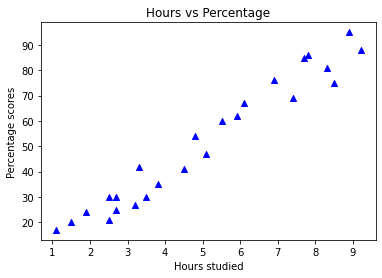

In [7]:
#plotting the distribution of scores
plt.scatter(df['Hours'],df['Scores'],color='Blue',marker='^')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
plt.show()

From the above graph, we can clearly see that there is a postivie linear relation between the number of hours studied and percentage of score.

# Preparing the data

The next step is to divide the data into "attributes"(inputs) and "labels(outputs).

In [8]:
x = df.iloc[:, :-1].values
y = df.iloc[: , 1].values

In [9]:
x.shape

(25, 1)

In [10]:
y.shape

(25,)

In [11]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print("Training complete")

Training complete


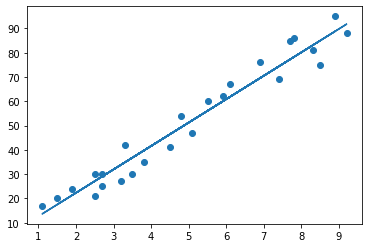

In [23]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_


# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making predictions

In [24]:
print(x_test)
y_pred = reg.predict(x_test)

[[7.7]
 [4.8]
 [1.5]
 [3.5]
 [5.1]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,85,77.275760
1,54,49.320710
2,20,17.509790
3,30,36.789135
4,47,52.212611


In [26]:
reg.score(x_test,y_test)

0.9358672710116965

# what will be the predicted score if a student studies for 9.25 hr/day?


In [27]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.21725313490106


# Evaluating the model

In [29]:
from sklearn import  metrics
print('mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error : ', metrics.mean_squared_error(y_test, y_pred))

mean absolute error :  5.379097347229709
mean squared error :  32.20489118876649


# Hence, the predicted score if a student studies for 9.25 hr/day is 92.21